# matplotlib Overview

<div class="alert alert-info">
This notebook is intended only to provide an overview of the matplotlib package. More complete documentation can be found at
<ul>
<li><a href="http://matplotlib.org/contents.html">matplotlib Documentation</a></li>
<li><a href="http://matplotlib.org/users/beginner.html">matplotlib beginners guide</a></li>
</ul>
</div>

<div class="alert alert-danger">
You'll need to have an internet connection for portions of this notebook.
</div>

## Introduction

Some of the leading packages for numerical ("scientific") computation in Python are

* NumPy. Tools for numerical computing. In Excel the basic unit is a cell, a single number. In NumPy the basic unit is a vector (a column) or matrix (a table or worksheet), which allows us to do things with an entire column or table in one line. This facility carries over to Pandas since Pandas is built on NumPy.
* Pandas. The leading package for managing data and our focus in this notebook.
* Matplotlib. The leading graphics package.

All of these packages come with the Anaconda distribution, which means we already have them installed and ready to use.

matplotlib is a python 2D plotting library which, according to its developers, "produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms". You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc, with just a few lines of code. Perhaps the best way to get a sense for its capabilities is to look at the [screenshots](http://matplotlib.org/users/screenshots.html), [thumbnails](http://matplotlib.org/gallery.html), and [samples](http://matplotlib.org/examples/index.html) provided at the matplotlib website

### Overview. 
In this notebook, we'll introduce matplotlib, the Python package devoted to 2D visualizations. Typically, we'll use use Pandas to read spreadsheet data into Python, perform some form of processing, and then visualize the results in matplotlib.

### Reminders

**Objects and methods**. Recall that we apply the method *justdoit* to the object *x* with *x.justdoit*.

**Help**. We can get help in the Jupyter console. For the hypothetical *x.justdoit*, we would type 
*x.justdoit?* in the Jupyter console.

**Data structures**. That's the term we use for specific organizations of data. Examples are lists, tuples, and dictionaries. Each has a specific structure and a set of methods that can be applied. Lists are (ordered) collections of objects between square brackets: *numberlist = [1, -5, 2]*. Dictionaries are (unordered) pairs of items between curly brackets: *namedict = {'Brady': 12, 'Gronk': 87}*. The first item in each pair is the "key," the second is the "value.""

**Integers, floats, and strings.** Three common types of data.

**Function returns** We refer to the output of a function as its return. We would say, for example, that the function type(x) returns the type of the input object x. We capture the return with an assignment: *xtype = type(x)*.

## Importing the libraries that we'll use

In [1]:
# Our standard set of imports for pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

# in addition, it will be useful in general if we keep our plots "inline" within the notebook
%matplotlib inline

## Creating Our Sample DataFrame

A DataFrame in pandas is a tabular representation of data. You can sort of think of it as being the equivalent to a worksheet in Microsoft Excel. As always, the easiest way to get a handle on this is to actually grab some data.

Now, let's write a little python to read a file in and create a DataFrame. We'll use the same *iris* data that we used with the DataFrame notebook.

In [2]:
# Let's import the pandas library
import pandas as pd

# Let's set up a URL to the file, which in this case is hosted on github
base_url = 'https://raw.githubusercontent.com/johnjfox/Analytic_Enterprise/master/data/'
data_url = 'iris/iris.data.csv'
url = base_url + data_url

# Now let's read the file
df = pd.read_csv(url)

# just for simplicity, I'm going to drop the ID column
df = df.drop(['ID'], axis=1)

# Finally, let's print the first few lines
print df.head(10)

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


## Basic Plotting Using The Built-In Methods on DataFrames

Let's start off with the absolutely simplest possible plot

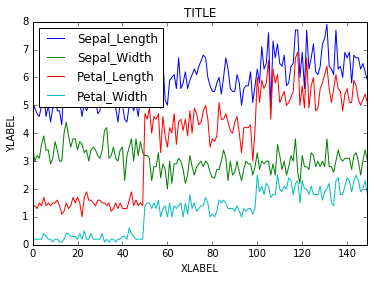

In [3]:
ax = df.plot();
ax.set_title('TITLE')
ax.set_xlabel('XLABEL')
ax.set_ylabel('YLABEL')

### Plotting a Single Line

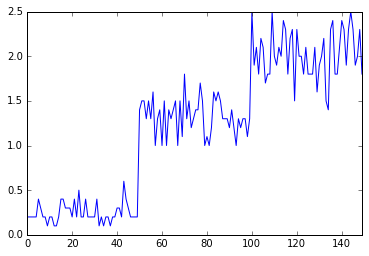

In [4]:
df['Petal_Width'].plot();

### Plotting Multiple Lines

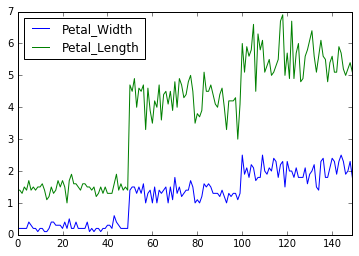

In [5]:
df[['Petal_Width', 'Petal_Length']].plot();

### Plotting Other Types of Graphs

**Bar Plots**

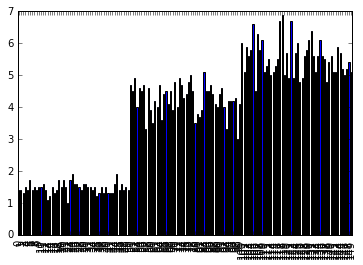

In [6]:
df['Petal_Length'].plot.bar();

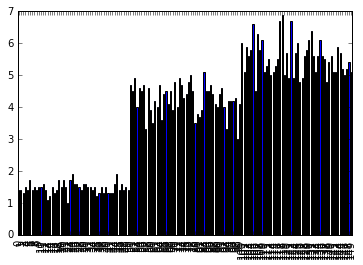

In [7]:
df['Petal_Length'].plot(kind='bar');

**Scatter Plots**

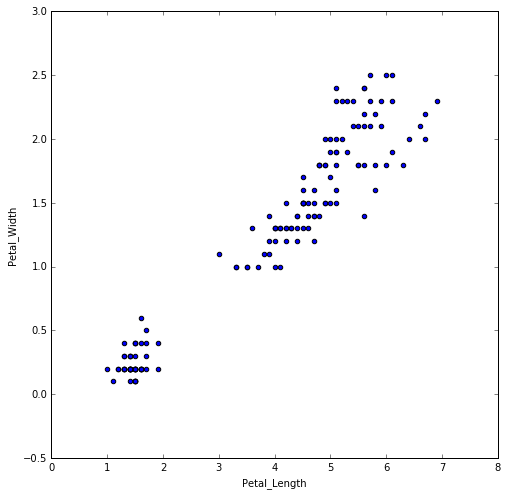

In [8]:
df.plot.scatter('Petal_Length', 'Petal_Width', figsize=(8,8));

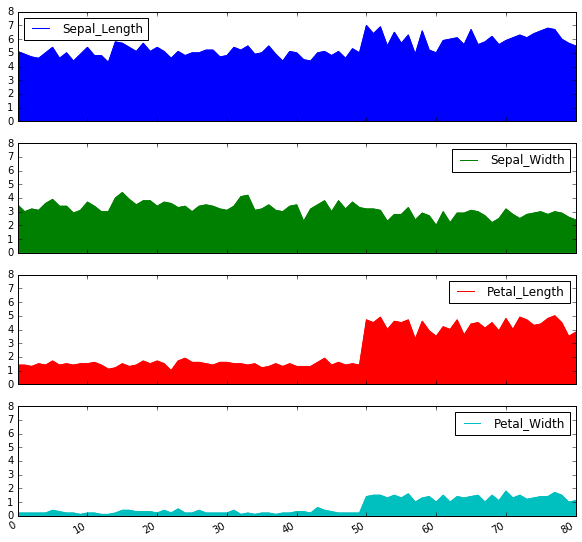

In [9]:
df.plot(kind='area', subplots=True, sharey='True', figsize=(10,10), xlim=(0,80));

### Using the pyplot module

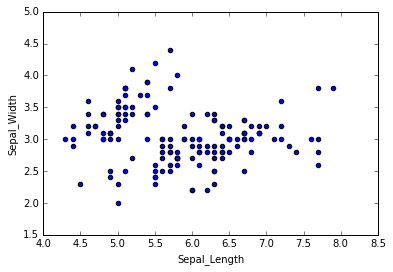

In [10]:
df.plot(kind='scatter', x='Sepal_Length', y='Sepal_Width');

**Scatter Matrix Plot**

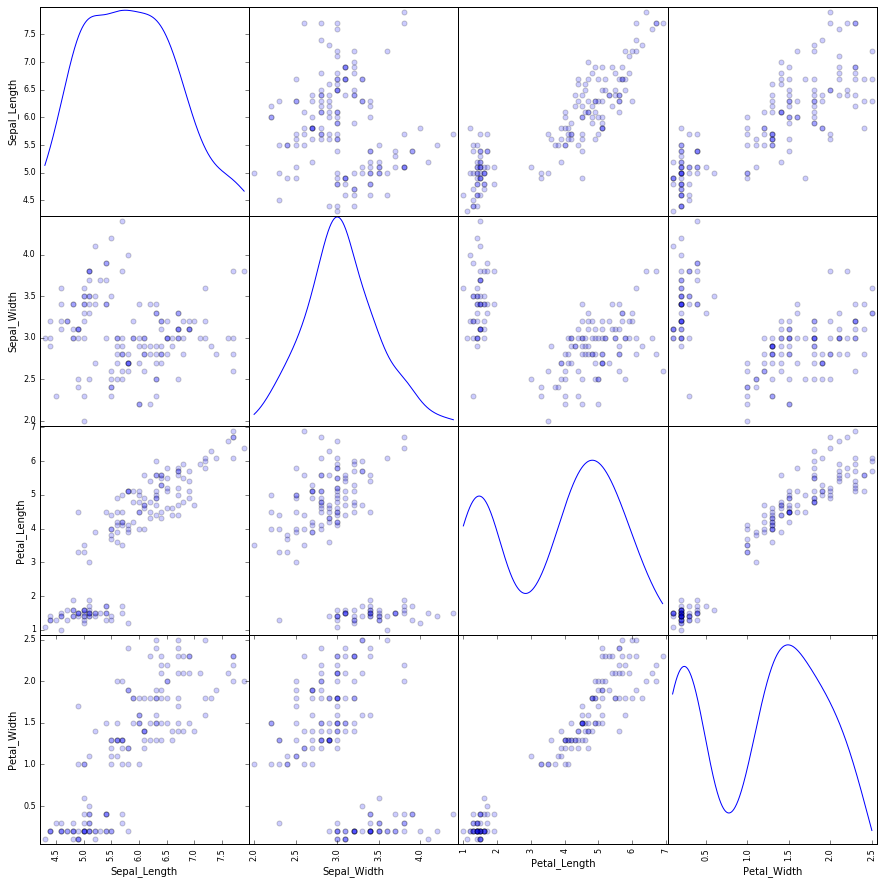

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2,s=100,figsize=(15,15), diagonal='kde');

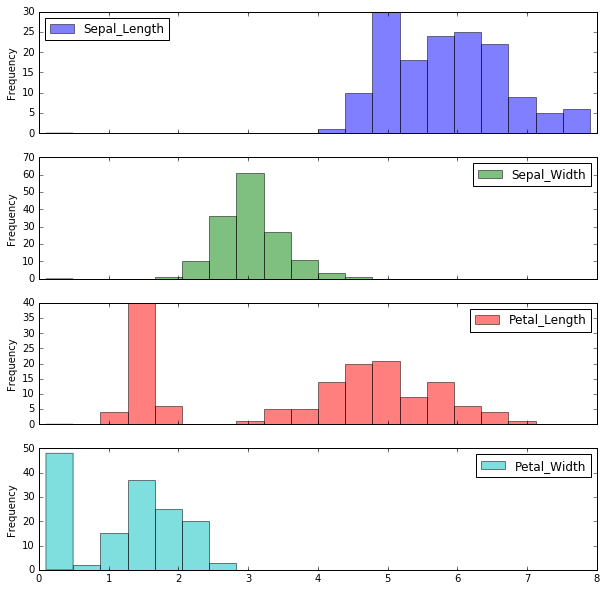

In [12]:
df.plot.hist(bins=20, subplots=True, alpha=0.5, figsize=(10,10));

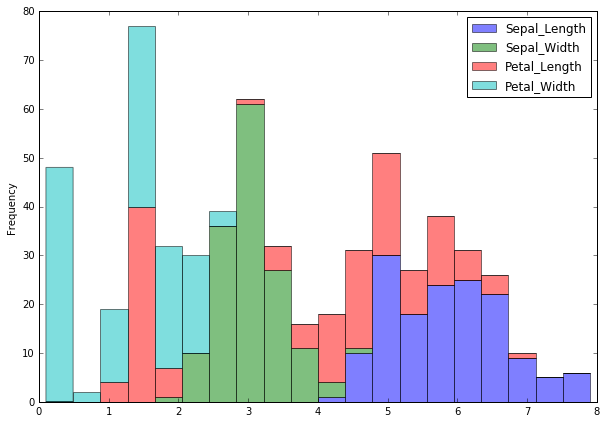

In [13]:
df.plot.hist(bins=20, stacked=True, alpha=0.5, figsize=(10,7));

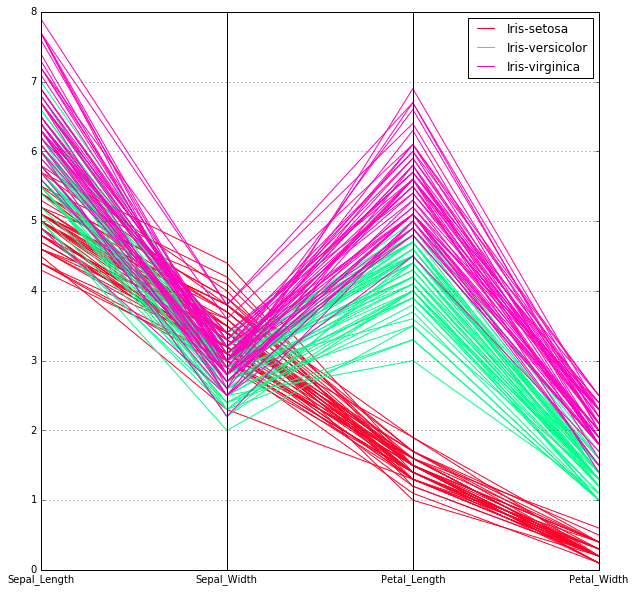

In [14]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(10,10))
parallel_coordinates(df, 'Class', colormap='gist_rainbow');

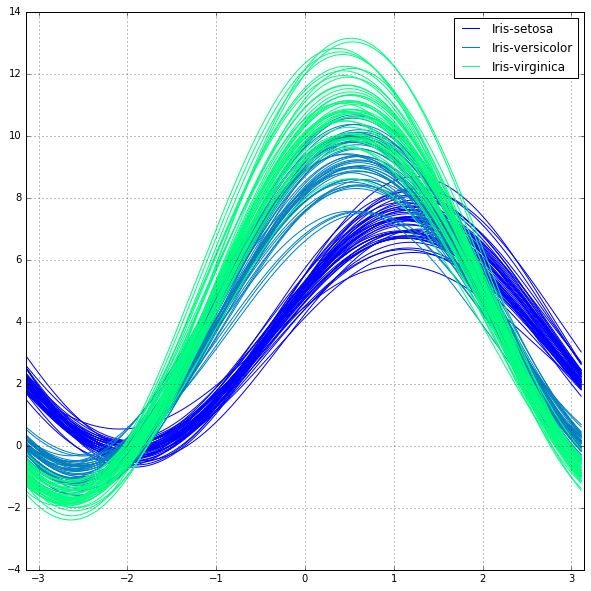

In [15]:
from pandas.tools.plotting import andrews_curves
plt.figure(figsize=(10,10))
andrews_curves(df, 'Class', colormap='winter');

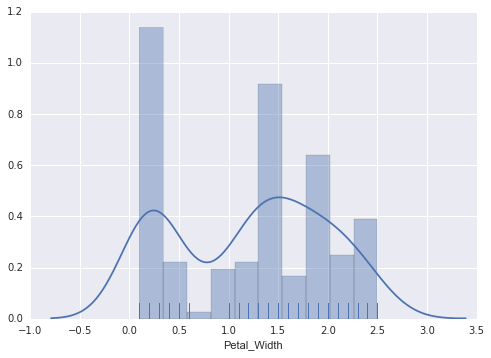

In [16]:
import seaborn as sns
sns.distplot(df.Petal_Width, rug=True, bins=10);

### Plotting Categorical Data

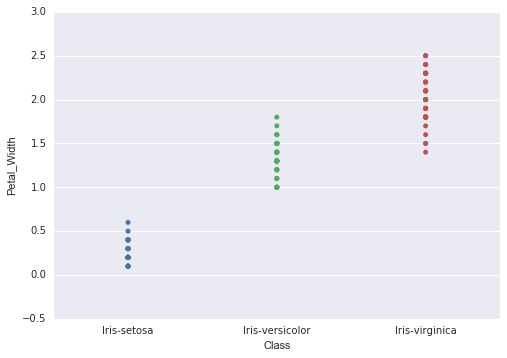

In [17]:
sns.stripplot(x="Class", y="Petal_Width", data=df);

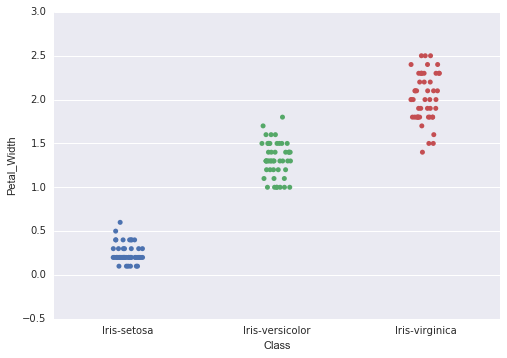

In [18]:
sns.stripplot(x="Class", y="Petal_Width", data=df, jitter= True);

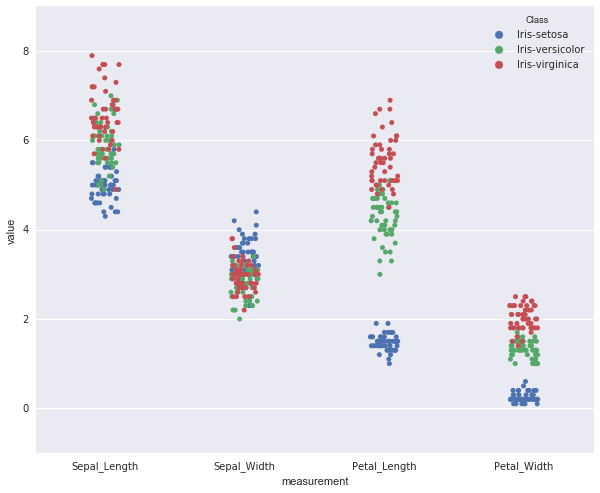

In [19]:
df_melt = pd.melt(df,'Class', var_name='measurement')
plt.figure(figsize=(10,8))
sns.stripplot(x='measurement', y='value', hue='Class', data=df_melt, jitter= True);

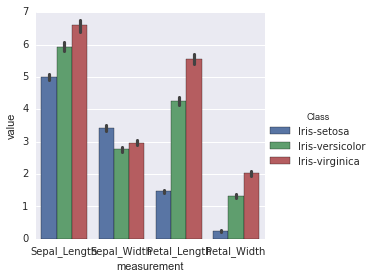

In [20]:
df_melt = pd.melt(df,'Class', var_name='measurement')
plt.figure(figsize=(10,10))
sns.factorplot(x='measurement', y='value', hue="Class", data=df_melt, kind="bar");

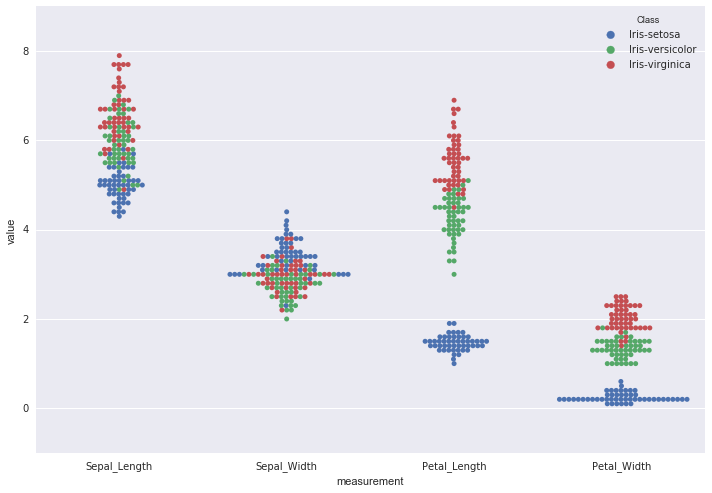

In [21]:
df_melt = pd.melt(df,'Class', var_name='measurement')
plt.figure(figsize=(12,8))
sns.swarmplot(x='measurement', y='value', hue='Class', data=df_melt);

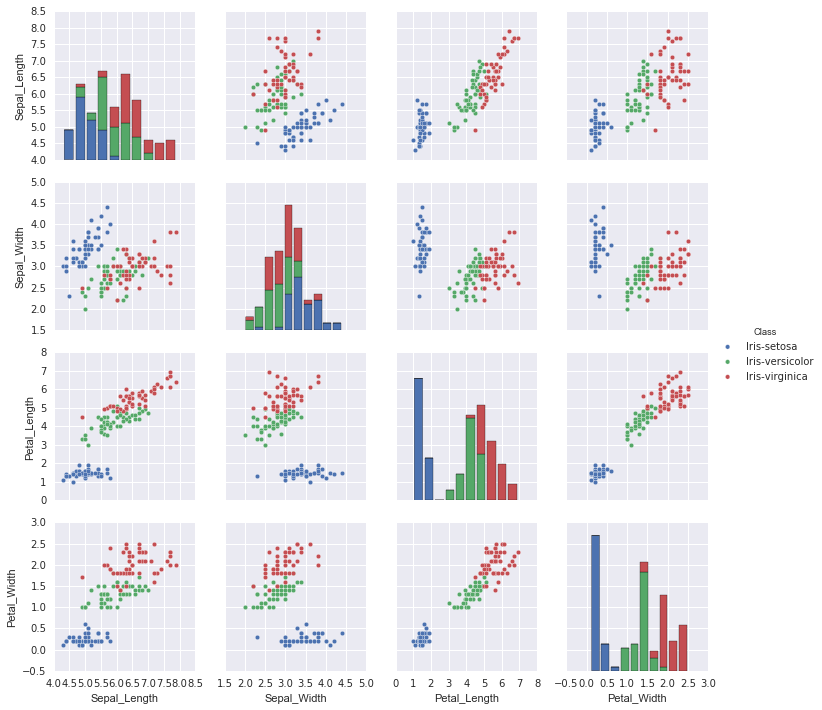

In [22]:
sns.pairplot(df, hue='Class');

### Using styles

In [23]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

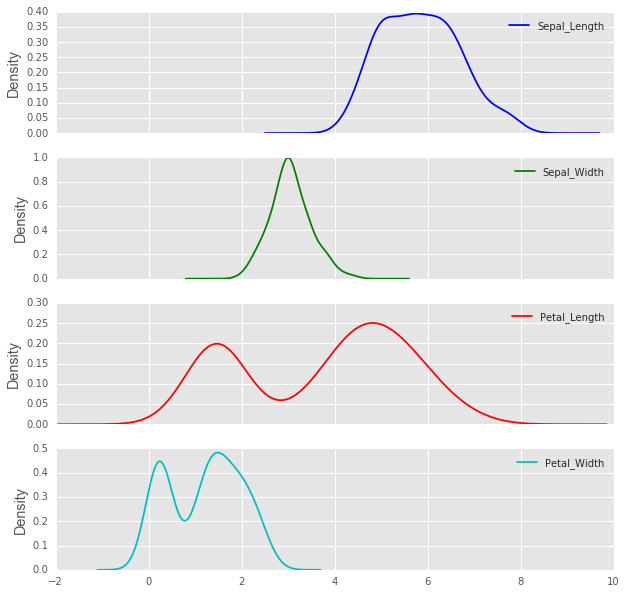

In [24]:
with plt.style.context(('ggplot')):
    df.plot(kind='kde', subplots=True, figsize=(10,10));

### Boxplots

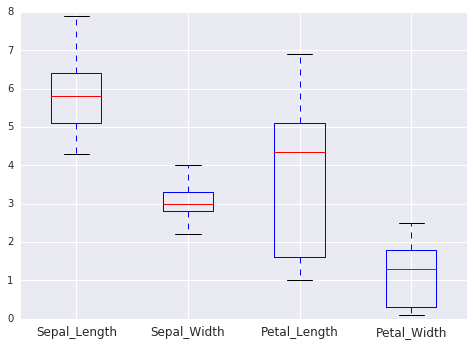

In [25]:
df.boxplot(return_type='axes');

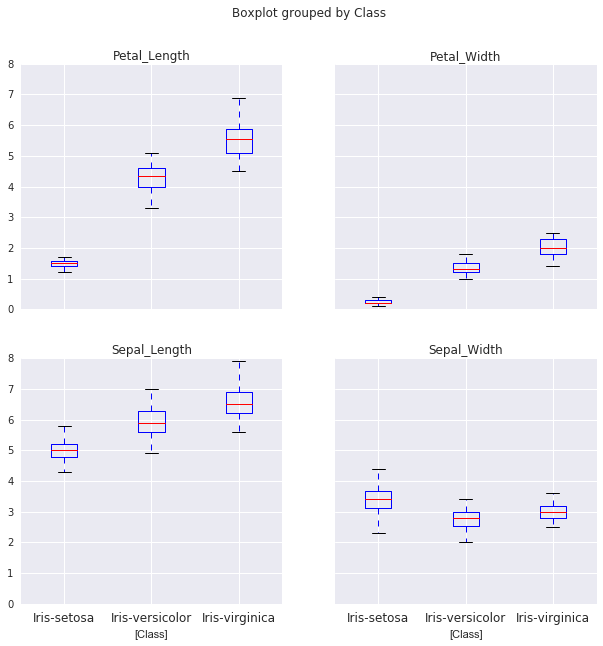

In [26]:
df.boxplot(return_type='axes',
           by='Class',
           figsize=(10,10));

### Regression Plots Functions